<img src="https://www.edureka.co/blog/wp-content/uploads/2018/03/Types-of-Machine-Learning-Waht-is-Machine-Learning-Edureka-2.png" >

+ Identiy patterns
- K-means
+ Anomaly Detection
- DBScan
- PCA
- Sparse PCA
- Kernel PCA 
- Guassian Random Projection Anomaly Detection
- Sparse Random Projection Anomaly Detection
- Dictionary Learning Anomaly Detection
- Univariate
    + Isolation Forest
- Multivariate
    + Cluster-based Local Outlier Factor (CBLOF)
    + Histogram-based Outlier Detection (HBOS)
+ LDA (Latent Direchlent Allocation)
- TSVD

# Association Rules

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
(df.isna().sum() / df.shape[0]) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Country', ylabel='count'>

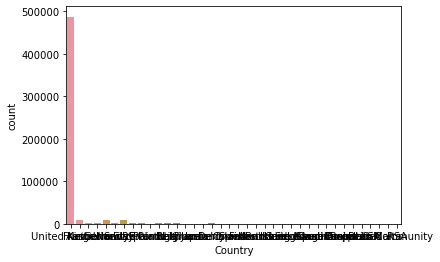

In [14]:
import seaborn as sns

sns.countplot(df.Country)


In [15]:
df.Country.value_counts()

United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Country', ylabel='count'>

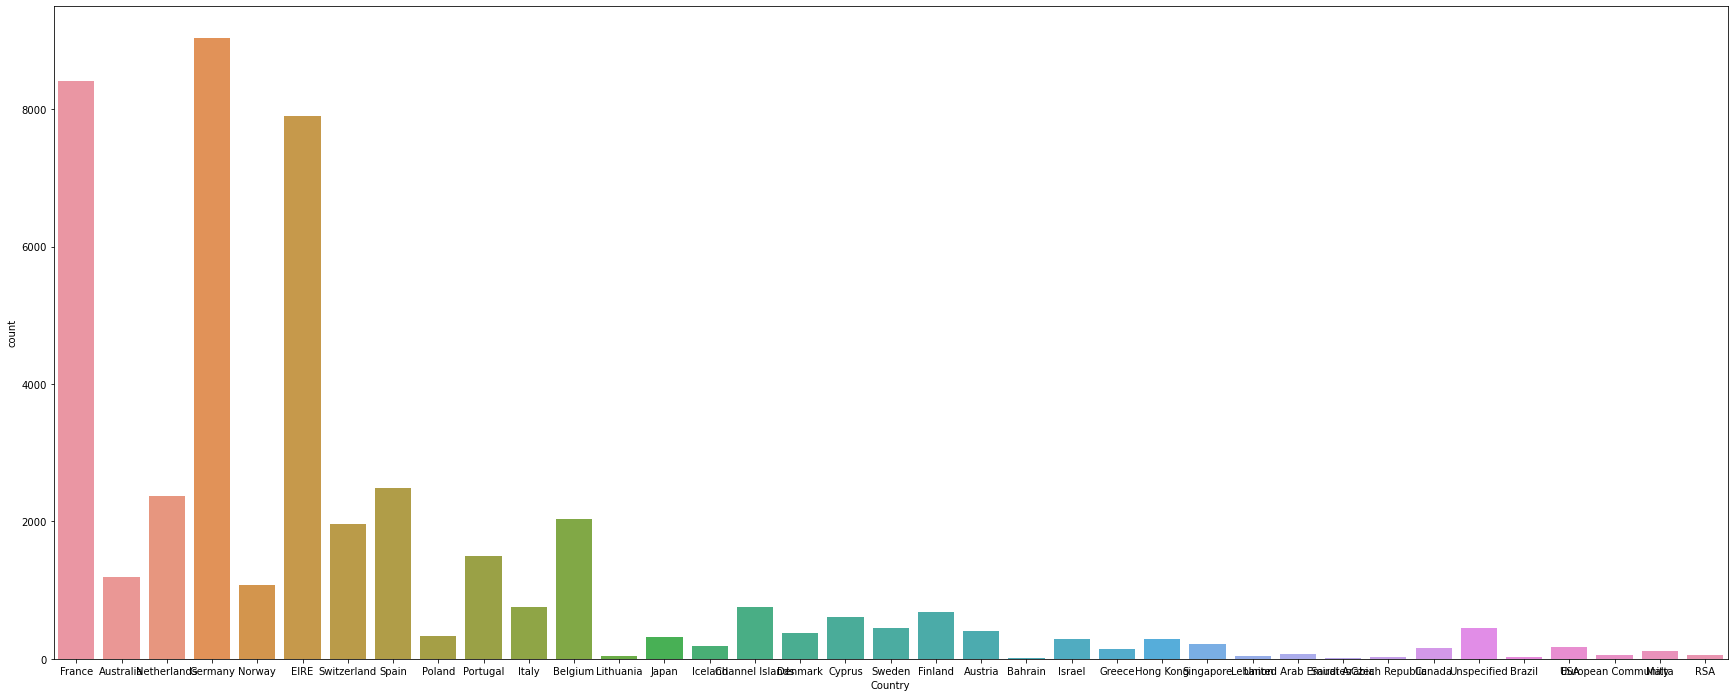

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,12))
sns.countplot(df[df.Country!="United Kingdom"].Country)

In [5]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

 France

In [6]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [7]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [9]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are going to have a baseline using the min support which provides the minimum of transactions is  0.07

In [10]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [11]:
frequent_itemsets.head(10)

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [13]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
20,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796


<img src="https://miro.medium.com/max/2134/1*--iUPe_DtzKdongjqZ2lOg.png" />

"""
Lift: el estadístico lift compara la frecuencia observada de una regla con la frecuencia esperada simplemente por azar (si la regla no existe realmente). El valor lift de una regla “si X, entonces Y” se obtiene acorde a la siguiente ecuación:
"""


References

+ https://www.cienciadedatos.net/documentos/43_reglas_de_asociacion

# Clustering

In [27]:
 pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("D:/Github/Data-Science/Datasets/pump_sensor_data/sensor.csv").drop(axis=1, columns=["Unnamed: 0"])

In [28]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

sensor_15         1.000000
sensor_50         0.349569
sensor_51         0.069821
sensor_00         0.046333
sensor_07         0.024741
sensor_08         0.023180
sensor_06         0.021777
sensor_09         0.020856
sensor_01         0.001675
sensor_30         0.001185
sensor_29         0.000327
sensor_32         0.000309
sensor_18         0.000209
sensor_17         0.000209
sensor_22         0.000186
sensor_25         0.000163
sensor_16         0.000141
sensor_49         0.000123
sensor_48         0.000123
sensor_47         0.000123
sensor_46         0.000123
sensor_45         0.000123
sensor_44         0.000123
sensor_43         0.000123
sensor_42         0.000123
sensor_41         0.000123
sensor_40         0.000123
sensor_39         0.000123
sensor_38         0.000123
sensor_14         0.000095
sensor_26         0.000091
sensor_03         0.000086
sensor_10         0.000086
sensor_13         0.000086
sensor_12         0.000086
sensor_11         0.000086
sensor_05         0.000086
s

In [29]:
df = df.drop_duplicates()
df.shape

(220320, 54)

In [30]:
df.drop(["sensor_15"], axis=1, inplace=True)
df.shape

(220320, 53)

In [31]:
df['date'] = pd.to_datetime(df['timestamp'])
del df['timestamp']

In [32]:
df.set_index("date", inplace=True)

<AxesSubplot:xlabel='sensor_50', ylabel='Density'>

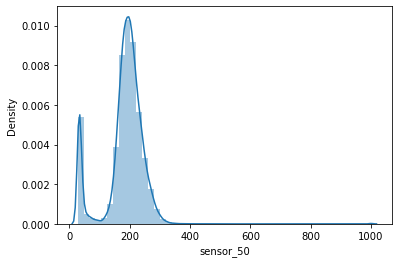

In [33]:
import seaborn as sns

sns.distplot(df.sensor_50)

In [34]:
df.fillna(df.mean().astype(int), inplace=True)

<AxesSubplot:xlabel='sensor_50', ylabel='Density'>

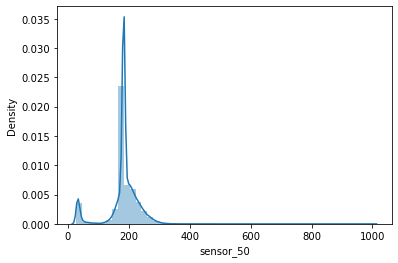

In [35]:
sns.distplot(df.sensor_50)

In [36]:
y = df.machine_status

df.drop(["machine_status"],axis=1, inplace=True)

In [37]:
y.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [38]:
broken = y[ y == 'BROKEN']
broken

date
2018-04-12 21:55:00    BROKEN
2018-04-18 00:30:00    BROKEN
2018-05-19 03:18:00    BROKEN
2018-05-25 00:30:00    BROKEN
2018-06-28 22:00:00    BROKEN
2018-07-08 00:11:00    BROKEN
2018-07-25 14:00:00    BROKEN
Name: machine_status, dtype: object

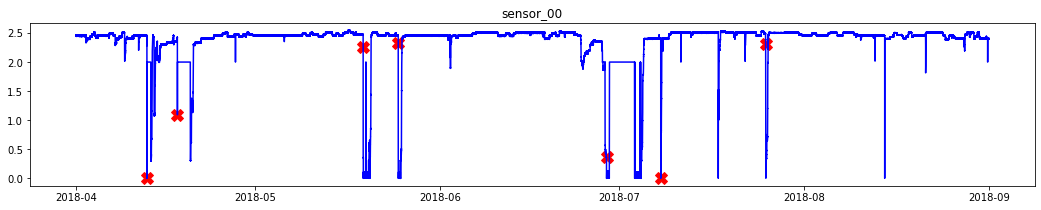

In [39]:
import matplotlib.pyplot as plt

_ = plt.figure(figsize=(18,3))
_ = plt.plot(df.loc[broken.index, "sensor_00"], linestyle="none", marker="X", color="red", markersize=12)
_ = plt.plot(df["sensor_00"], color="blue")
_ = plt.title("sensor_00")
plt.show()

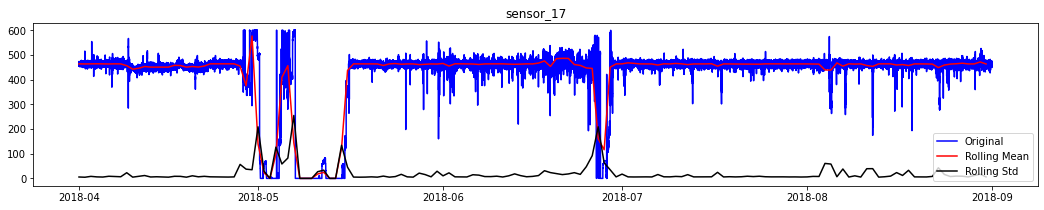

In [40]:
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()

_ = plt.figure(figsize=(18,3))
_ = plt.plot(df["sensor_17"], color='blue', label='Original')
_ = plt.plot(rollmean["sensor_17"], color='red', label='Rolling Mean')
_ = plt.plot(rollstd["sensor_17"], color='black', label='Rolling Std' )
_ = plt.legend(loc='best')
_ = plt.title("sensor_17")
plt.show()

In [41]:
# from pyod.models.cblof import CBLOF
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# minmax = MinMaxScaler(feature_range=(0, 1))
minmax =  StandardScaler()
minmax.fit(df)
result = minmax.transform(df)

result = pd.DataFrame(result, columns=df.columns)

<AxesSubplot:xlabel='sensor_50', ylabel='Density'>

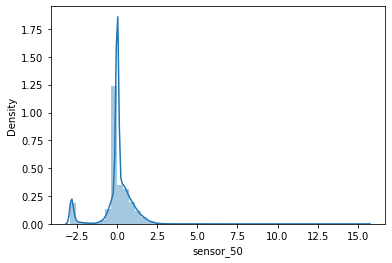

In [42]:
sns.distplot(result.sensor_50)

In [43]:
from sklearn.decomposition import PCA

random_state = 2018

pca = PCA(random_state=random_state)

X_train_PCA = pca.fit_transform(result)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=df.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=result.index)

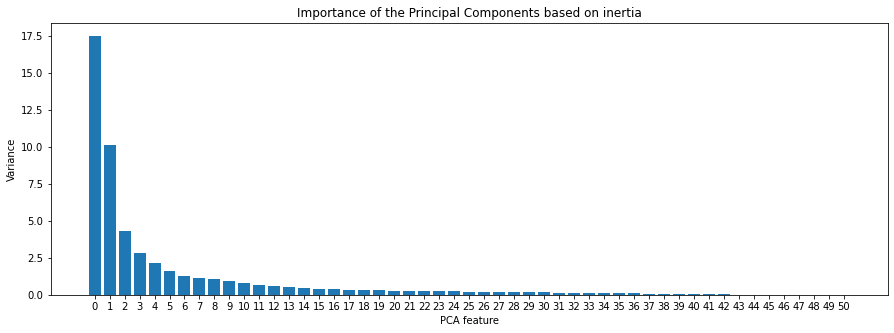

In [44]:
import matplotlib.pyplot as plt

features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [45]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(result)
principalDf = pd.DataFrame(data =principalComponents, columns=["pc1", "pc2"])

In [46]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey Fuller Test
result = adfuller(principalDf["pc1"])
result[1]

0.0001458868020050365

In [47]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey Fuller Test

(adfuller(principalDf["pc1"])[1],  adfuller(principalDf["pc2"])[1])

(0.0001458868020050365, 1.617609983285142e-09)

the last result shows that the value is smaller than 0.05, then we can reject the Null Hipothesis and say the data is stationary.

In [48]:
(principalDf.pc1.autocorr(),principalDf.pc2.autocorr())

(0.9995598986371708, 0.9988699337604199)

*Modeling*

In [52]:
principalDf.set_index(df.index.values, inplace=True)

***

<AxesSubplot:xlabel='pc1'>

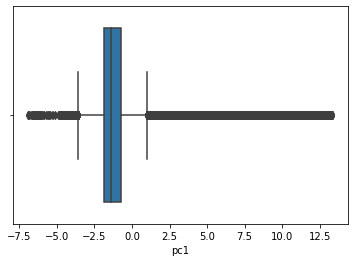

In [68]:
sns.boxplot(principalDf.pc1)

In [58]:
q1_pc1, q3_pc1 = principalDf.pc1.quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1

In [59]:
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

In [78]:
df['anomaly_pc1'] = ((principalDf['pc1']>upper_pc1) | (principalDf['pc1']<lower_pc1)).astype('int')

In [74]:
principalDf.anomaly_pc1.shape

(220320,)

In [79]:
q1_pc2, q3_pc2 = principalDf['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2

lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

df['anomaly_pc2'] = ((principalDf['pc2']>upper_pc2) | (principalDf['pc2']<lower_pc2)).astype('int')

In [76]:
principalDf.anomaly_pc2.shape

(220320,)

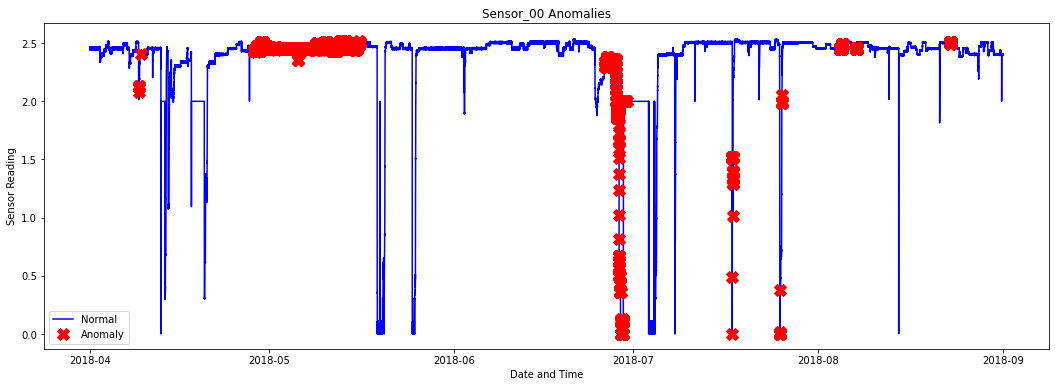

In [81]:
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_00'], color='blue', label='Normal')
_ = plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [86]:
"anomalies using pc1 {}".format(df[df.anomaly_pc1 == 1].shape[0])

'anomalies using pc1 28555'

***

In [53]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(gamma='auto').fit(principalDf['2018-04-01':'2018-07-01'])
clf.predict(principalDf['2018-07-01':])

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [54]:
result = clf.predict(principalDf['2018-07-01':])

In [89]:
pd.Series(result).value_counts()

-1    87925
 1     1355
dtype: int64

***

# Another Example

In [2]:
import pandas as pd

df = pd.read_excel("D:/Github/Data-Science/Datasets/Sample - Superstore.xls", index_col=0)

In [3]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.columns = df.columns.str.replace(" ", "_").str.lower()

In [5]:
df.sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: sales, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   ship_mode      9994 non-null   object        
 4   customer_id    9994 non-null   object        
 5   customer_name  9994 non-null   object        
 6   segment        9994 non-null   object        
 7   country        9994 non-null   object        
 8   city           9994 non-null   object        
 9   state          9994 non-null   object        
 10  postal_code    9994 non-null   int64         
 11  region         9994 non-null   object        
 12  product_id     9994 non-null   object        
 13  category       9994 non-null   object        
 14  sub-category   9994 non-null   object        
 15  product_name   9994 n

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

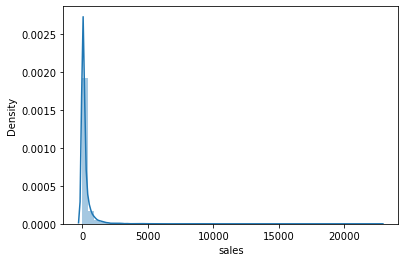

In [7]:
import seaborn as sns

sns.distplot(df.sales)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sales'>

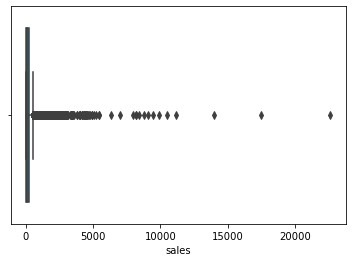

In [8]:
sns.boxplot(df.sales)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'Sales'),
 Text(0.5, 1.0, 'Sales distribution')]

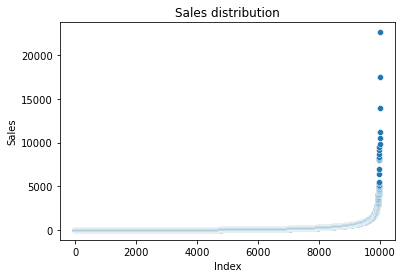

In [9]:
ax = sns.scatterplot(range(df.shape[0]), df.sales.sort_values(ascending=True).values)
ax.set(xlabel="Index", ylabel="Sales", title="Sales distribution")

*Profit*

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='profit', ylabel='Density'>

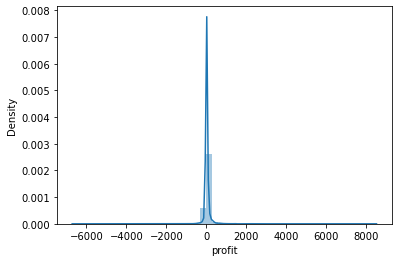

In [10]:
import seaborn as sns

sns.distplot(df.profit)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'Profit'),
 Text(0.5, 1.0, 'Profit distribution')]

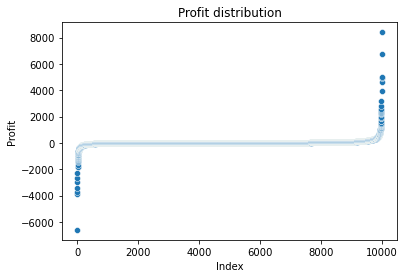

In [11]:
ax = sns.scatterplot(range(df.shape[0]), df.profit.sort_values(ascending=True).values)
ax.set(xlabel="Index", ylabel="Profit", title="Profit distribution")

*Sales & Profit*

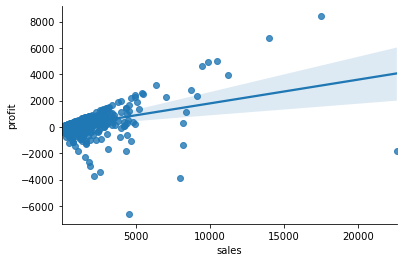

In [12]:
sns.regplot(x="sales", y="profit", data=df)
sns.despine()

*Cluster-based Local Outlier Factor (CBLOF)*

Let's the application of Cluster-based Local Outlier Factor (CBLOF) that calculates the outlier score. An anomaly score is computed by the distance of each instance to its cluster center multiplied by the instances belonging to its cluster. PyOD library includes the CBOLF implementation.

In [13]:
from pyod.models.cblof import CBLOF
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0, 1))

df[['sales', 'profit']] = minmax.fit_transform(df[['sales', 'profit']])

In [14]:
X1 = df['sales'].values.reshape(-1, 1)
X2 = df['profit'].values.reshape(-1, 1)
X = pd.np.concatenate((X1, X2), axis=1)


outliers_fraction = 0.01

clf  =  CBLOF(contamination = outliers_fraction, check_estimator=False, random_state=0)
clf.fit(X)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=1, random_state=0,
   use_weights=False)

In [15]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
pd.Series(y_pred).value_counts()

0    9894
1     100
dtype: int64

In [17]:
scores_pred = clf.decision_function(X) * -1

In [18]:
n_inliers = len(y_pred) - pd.np.count_nonzero(y_pred)
n_outliers = pd.np.count_nonzero(y_pred == 1)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [32]:
df1 = pd.DataFrame(y_pred.tolist(), columns=["outlier"])

inliers_sales = pd.np.array(df.iloc[df1[df1['outlier'] == 0].index].sales).reshape(-1, 1)
inliers_profit = pd.np.array(df.iloc[df1[df1['outlier'] == 0].index].profit).reshape(-1, 1)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


In [34]:
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = pd.np.array(df.iloc[df1[df1['outlier'] == 1].index].sales).reshape(-1, 1)
outliers_profit = pd.np.array(df.iloc[df1[df1['outlier'] == 1].index].profit).reshape(-1, 1)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
threshold = pd.np.percentile(scores_pred, 100 * outliers_fraction)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [36]:
xx, yy = pd.np.meshgrid(pd.np.linspace(0, 1, 100), pd.np.linspace(0, 1, 100))

Z = clf.decision_function(pd.np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


Outliers: 100 inliers: 9894


C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


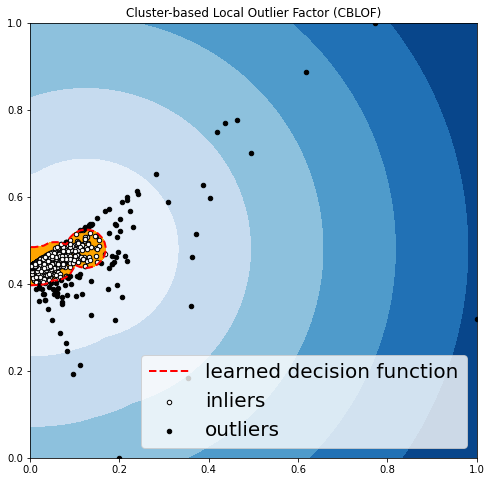

In [37]:
import matplotlib.pyplot as plt
import matplotlib 

print("Outliers:",n_outliers, "inliers:",n_inliers)
plt.figure(figsize=(8,8))

plt.contourf(xx, yy, Z, levels=pd.np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)

a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors="red")
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c="white", s=20, edgecolor="k")
c = plt.scatter(outliers_sales, outliers_profit, c="black", s=20, edgecolor="k")

plt.axis('tight')   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Cluster-based Local Outlier Factor (CBLOF)')
plt.show();